## Dimensionality Reduction and Clustering

For this homework we will be using some image data! Specifically, the MNIST data set. You can load this data easily with the following commands:

https://github.com/TristanMoser/byu_econ_applied_machine_learning/blob/master/homeworks/Homework_5_TristanMoser.ipynb
https://github.com/jacoblefler/byu_econ_applied_machine_learning/blob/master/homeworks/Dimensionality%20Reduction%20and%20Clustering.ipynb
https://github.com/alidoxey/byu_econ_applied_machine_learning/blob/master/hw_5_v2.ipynb


In [15]:
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

The MNIST data set is hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data

For this homework, perform the following with the MNIST data:

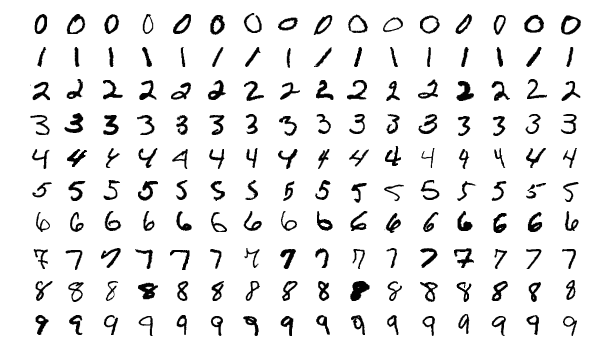

In [5]:
# Source: https://en.wikipedia.org/wiki/MNIST_database
from IPython.display import Image 
Image('https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png')

In [9]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Use PCA to reduce the dimensionality

In [10]:
X.shape

(70000, 784)

So looking at the shape of our data we can see why there would be a need to use PCA to reduce the dimensionality of our data. Trying to imagine our data into 784 dimensions would be impossible. So reducing the dimensions can help us visulize exactly what is happening our data and we can look to see if there are general patterns in our data. 

In [11]:
y.shape

(70000,)

In [21]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

## a. How many components did you use? Why?

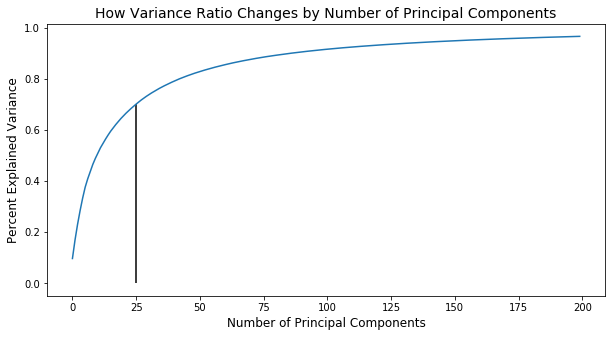

In [25]:
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
f, ax = plt.subplots(figsize = (10,5))
ax.set_title("How Variance Ratio Changes by Number of Principal Components", fontsize = 14)
plt.ylabel("Percent Explained Variance", fontsize = 12)
plt.xlabel("Number of Principal Components", fontsize = 12)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[25],x=25)
plt.show()


So looking at our Elbow Graph we see that around 25 components the rate at which our components starts explaining the variance in our data starts decreasing significantly. I could use this as our # of components if I wanted to maximize the efficency of my computer processing. 

In [30]:
pca = PCA(n_components=.69)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 25)


25 components only explains 69% of the data. This is not incredibly high, so it may be worth some inefficency (in my computers processing power) to increase this number

In [22]:
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 87)


In order to achieve 90% explained variance in our data we need 87 components. Which is a significant increase over 25 components. So in the end I will just stick with using 25 components in my PCA dimension reduction to see how it looks. 

In [31]:
pca = PCA(n_components=25)
Xdim25 = pca.fit_transform(X)
Xdim25I = pca.inverse_transform(Xdim25)

## b. Plot the first two components. Do you notice any trends? What is this plot showing us?

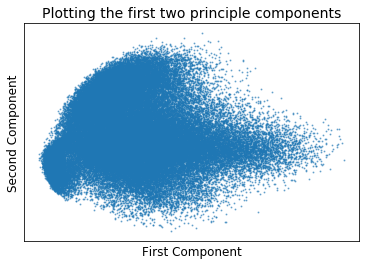

In [32]:
plt.title("Plotting the first two principle components", fontsize=14)
plt.ylabel("Second Component", fontsize = 12)
plt.xlabel("First Component", fontsize = 12)
plt.xticks([])
plt.yticks([])
plt.scatter(Xdim25[:,0], Xdim25[:,1], alpha=.5, s=1)
plt.show()

The first component has more variance than the second component. We expect this as each additional component contributes less to the explained variance then the previous. There doesn't seem to be any obvious correlation or trend between the two components. This makes sense because the different components all capture difference sources of variance, so the variance that is not being captured by the first component is probably being captured by the second component. 

## c) PCA: Pros and Cons
Pros:
PCA can be used on virtually any set of data, so it is really versatile and can do a great job at helping really complex data be visualized. I don't overly understand the image above, and how it relates to thousands of pixels that represent hand drawn numbers, however I know that it was able to do it--which is impressive. PCA uses the best possible vector combination in each component set, so we know that we are getting the best reduction possible with our specification of the # of components we want. 

Cons:
Looking online we can see that PCA has many instances in which it may not function as well. PCA uses Euclidean distance to calculate the orthogonal vector that gives the reduction with the most variance. Because of this, this can cause problems in datasets where there are many categorical variables. Also if we significantly reduce the dimensionality of our data we can have problems interpreting and understanding what we are seeing. 

## d. Plot some of the images, then compress them using PCA and plot again. How does it look?

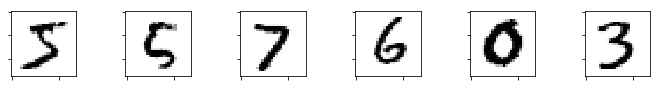

In [35]:
fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 2000
    plt.imshow(X[ii*2000].reshape((28,28)), cmap='Greys')

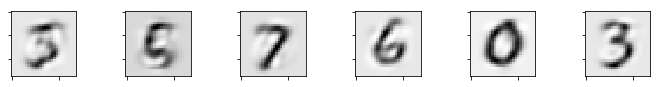

In [39]:
pca = PCA(n_components=26)
X_26dim = pca.fit_transform(X)

#Transfrom back to its original space
reverse = pca.inverse_transform(X_26dim)

fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 2000
    plt.imshow(reverse[ii*2000].reshape((28,28)), cmap='Greys')

So it looks like we can generally make out what these numbers are--especially the numbers which are significantly different than the other numbers (such as "0" or "2"). However I am scared that a reduction in the dimensionality like this would cause the model to have a hard time decifering between numbers which have a more minute difference such as "4" and "9". 

# 2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

In [40]:
from sklearn.manifold import TSNE

In [41]:
pca = PCA(n_components=26)
X_26dim = pca.fit_transform(X)

#Randomize entries in the original data
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

#Fit our data to the TSNE model
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.051s...
[t-SNE] Computed neighbors for 10000 samples in 5.583s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 265.797018
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.692741
[t-SNE] KL divergence after 1000 iterations: 1.742518


Text(0.5, 1.0, 'TSNE 2D Plot')

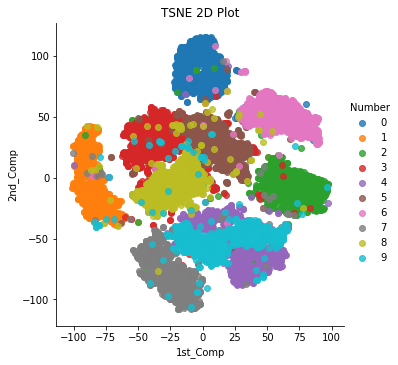

In [42]:
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE 2D Plot")

 ## a. How does this plot differ from your PCA plot?
 
 This plot is much better than the PCA plot. First off we can easily visualize which numbers our model is having a hard time differentiating. Like I originally thought numbers that are a little more unique like "0" it is not having a hard time decifering, however numbers such as "4" and "9" it is showing significant overlap still between these two numbers. This plot is much easier to interpret and to gather insights from. 

## b. How robust is it to changes in perplexity?

In [43]:
tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

Text(0.5, 1.0, 'TSNE with Perplexity of 5')

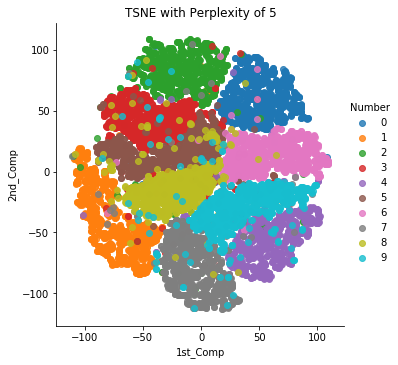

In [44]:

#Perplexity 5 plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Perplexity of 5")

In [45]:
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

Text(0.5, 1.0, 'TSNE with Perplexity of 50')

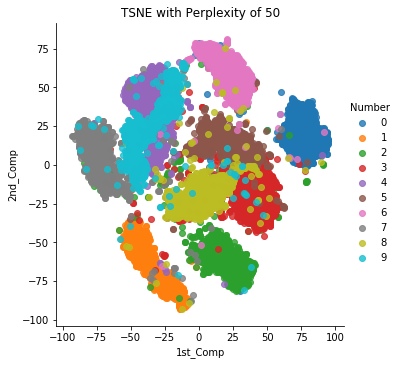

In [46]:
#Perplexity 50 plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Perplexity of 50")

It seems like our model is not very robust to changes in perplexity, as the change from 5 to 50 had a significant change in how our TSNE plot looks. There are more definite clusters, which is a good sign, however it is still having problems with some of the digits

## c. How robust is it to different learning rate and number of iterations?

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.017s...
[t-SNE] Computed neighbors for 10000 samples in 8.566s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 270.951434
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.626671
[t-SNE] KL divergence after 1000 iterations: 1.898478


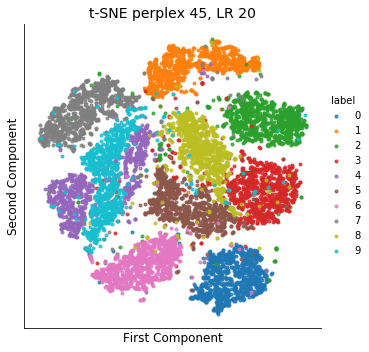

In [47]:
# Decrease learning rate to 20 (close to the minimum)
tsne45 = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=1000, learning_rate=20)
tsne_results45 = tsne45.fit_transform(X_pca[rows[:n_select],:])

df_tsne45 = pd.DataFrame(tsne_results45, columns=['comp1', 'comp2'])
df_tsne45['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne45, hue='label', fit_reg=False, markers='.')
plt.title("t-SNE perplex 45, LR 20", fontsize=14)
plt.ylabel("Second Component", fontsize = 12)
plt.xlabel("First Component", fontsize = 12)
plt.xticks([])
plt.yticks([])
plt.show()

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.015s...
[t-SNE] Computed neighbors for 10000 samples in 6.023s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 270.951434
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.621155
[t-SNE] KL divergence after 1000 iterations: 1.655960


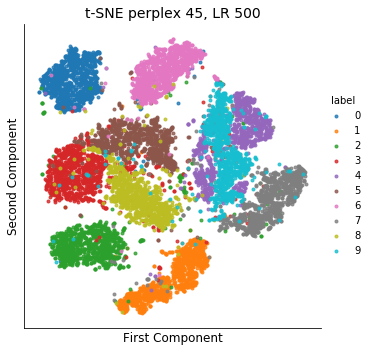

In [48]:
# Increase learning rate to 500
tsne45 = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=1000, learning_rate=500)
tsne_results45 = tsne45.fit_transform(X_pca[rows[:n_select],:])

df_tsne45 = pd.DataFrame(tsne_results45, columns=['comp1', 'comp2'])
df_tsne45['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne45, hue='label', fit_reg=False, markers='.')
plt.title("t-SNE perplex 45, LR 500", fontsize=14)
plt.ylabel("Second Component", fontsize = 12)
plt.xlabel("First Component", fontsize = 12)
plt.xticks([])
plt.yticks([])
plt.show()

So it seems overall that our model is pretty robust when it comes to changes in the learning rate. In each of the plots almost the same exact shapes form. "1" especially has a very unique shape that is similar in both of our plots, as well the unique shape formed by "3" "8" and "5" is very prevelant in both of the plots. This is indicitive that our model is pretty robust to changes in the learning rate

# 3. Perform k-means clustering:

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score

## a. How did you choose k?

For this modeling project the process of choosing K is actually quite easy for us. In Prof Folkman's lectures he said "the problem might dictate a reasonable value of k", and for this problem this is exactly the case. We are trying to determine what number (of the digits 0-9) are we seeing? Because of this we should choose k=10 for our k in this k-means clustering model.

In [51]:
#Define our kmeans model
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
k_clusters = kmeans.predict(X)

## b. How did you evaluate your clustering?

Scikit-Learn provides for us some different metrics that we can use to evaluate our clustering. Noteably there is the Adjusted Rand Score and the Completeness Score, which are defined below: 

Adjusted Rand Score: Computes a similarity measure between two clusterings by considering all paris of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. Score is between -1 and 1 with 1 being a perfect score.

Completeness Score: A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. Score is between 0 and 1.

In [53]:
print("Adjusted Rand Score: {}"
      .format(adjusted_rand_score(y, k_clusters)))

Adjusted Rand Score: 0.3667529513597255


In [54]:
print("Completeness Score: {}"
      .format(completeness_score(y, k_clusters)))

Completeness Score: 0.5035989997170205


##  c. Visualize your clusters using t-sne

Text(0.5, 1.0, 'Truth')

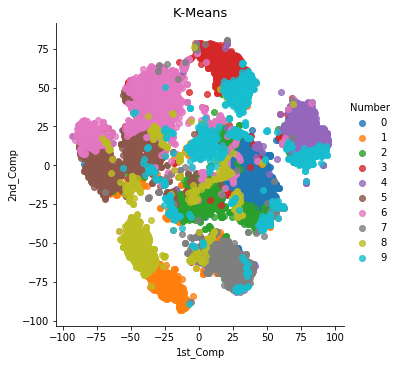

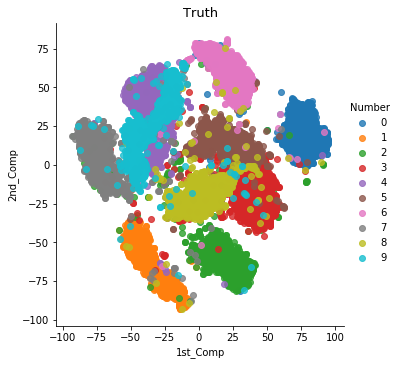

In [56]:
df_kmeans = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_kmeans['Number'] = k_clusters[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_kmeans,hue='Number',fit_reg=False)
plt.title("K-Means",fontsize=13)

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("Truth",fontsize=13)

 ## d. Did you scale your data?

All of the data points are on the same scale (0-255), so you do not have to scale the data. I'll do it below just to test it out though

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
scaler.fit(X)
scaled = scaler.transform(X)

In [59]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Adjusted Rand Score: 0.3667529513597255
Completeness Score: 0.44261559252174254


Text(0.5, 1.0, 'Scaled K-Means')

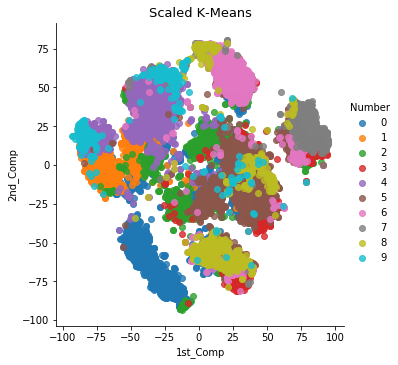

In [60]:
sk_clusters = kmeans.predict(scaled)
df_kmeans = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_kmeans['Number'] = sk_clusters[rows[:n_select]]
print("Adjusted Rand Score: {}".format(adjusted_rand_score(y, k_clusters)))
print("Completeness Score: {}".format(completeness_score(y,sk_clusters)))

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_kmeans,hue='Number',fit_reg=False)
plt.title("Scaled K-Means",fontsize=13)

So my initial intuition behind not scaling the data seemed to be correct. Scaling the data seems like it actually makes it harder for the model to distinguish between the numbers.

## e. How robust is your clustering?

In [64]:
def robust_check(size):
    for num in range(4):
        np.random.seed(seed=num)
        rows = np.arange(70000)
        np.random.shuffle(rows)
        n_select=size
        tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=1000, learning_rate=500)
        results = tsne.fit_transform(X_26dim[rows[:n_select],:])
        kmeanss = kmeans.fit(X[rows[:n_select],:])
        k_clusters = kmeanss.predict(X)
        df = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
        df['Number'] = k_clusters[rows[:n_select]]
        sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df,hue='Number',fit_reg=False)
        plt.title("Random Sample of size {}".format(size))

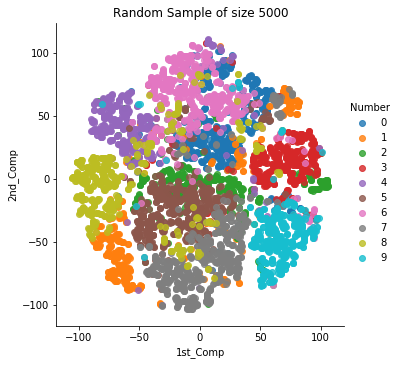

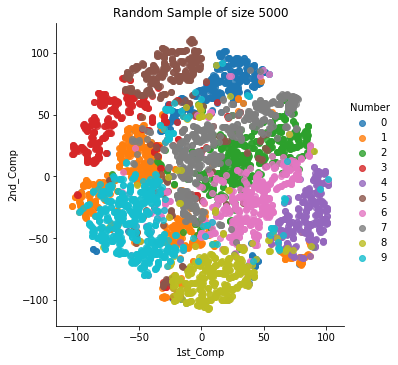

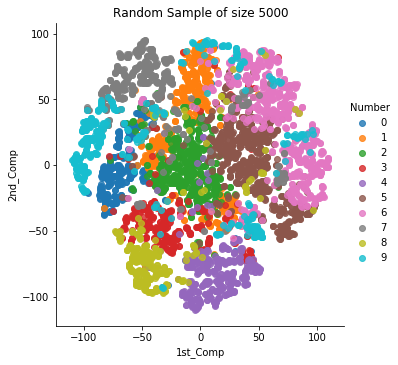

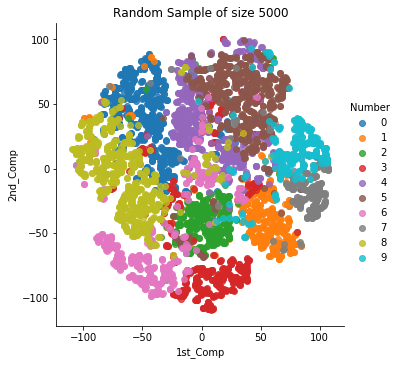

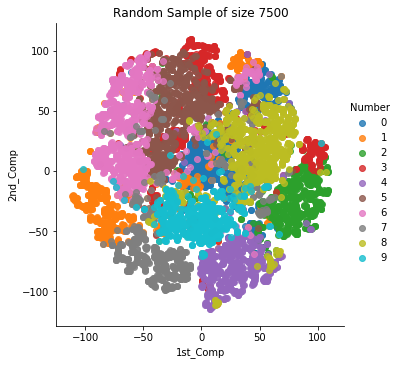

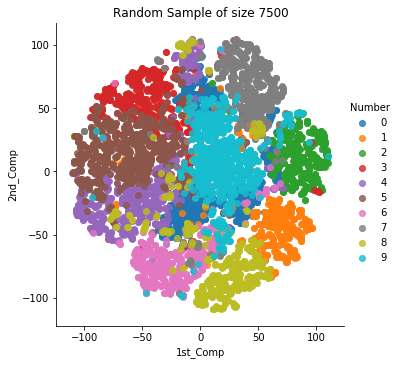

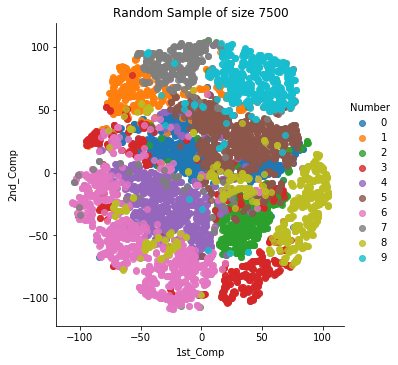

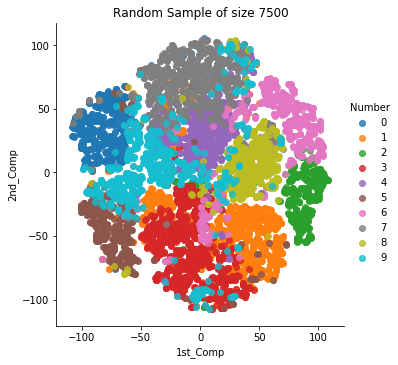

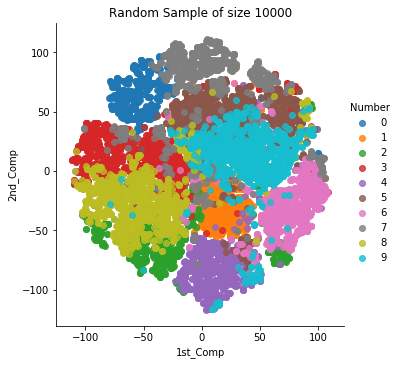

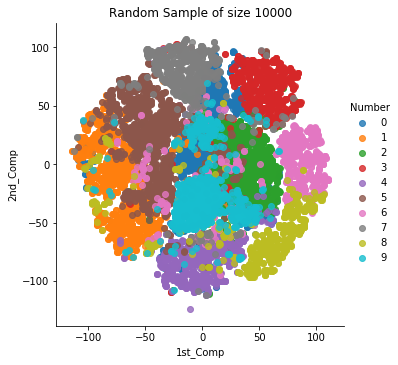

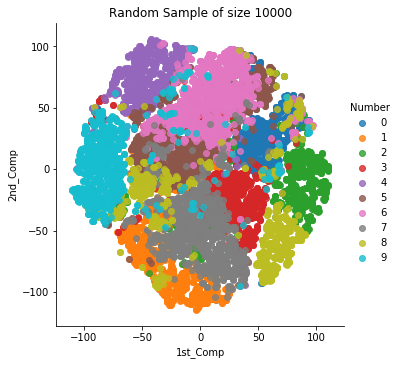

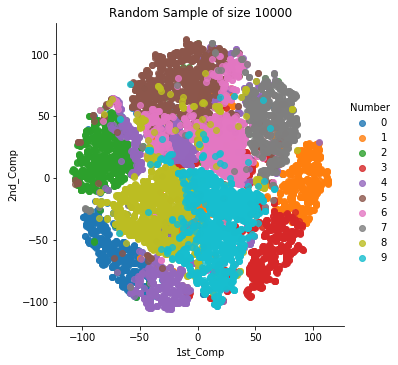

In [65]:
#Loop over random sample sizes
for size in [5000,7500,10000]:
    robust_check(size)

Our model seems to change according to the sample size in which we give it. Overall there do not seem to be any large changes, however it does look like it is not very robust. 

# 4. Perform hierarchical clustering:

In [66]:
#allow for a random sample of 100 observations from the MNIST data
rows = np.arange(70000)
np.random.shuffle(rows)
n_select_100 = 100

##  a. Plot your dendrogram

The first method for making my dendrogram I will use the "complete" method, which uses the maximum distance between points in clusters to merge clusters. 

Text(0.5, 1.0, 'Complete Linkage Dendrogram')

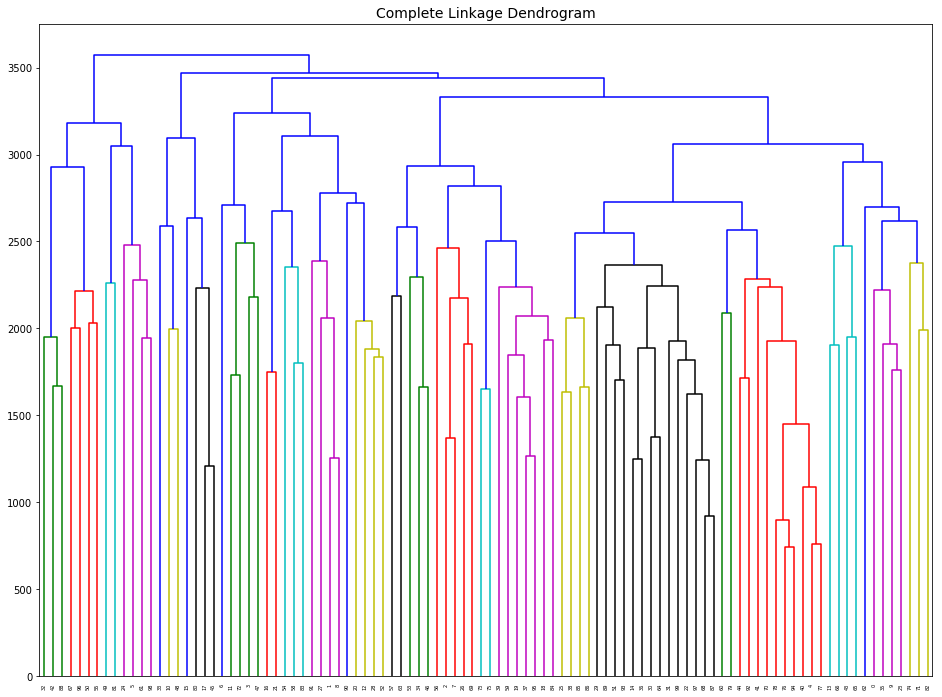

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X[rows[:n_select_100],:], 'complete')
plt.figure(figsize=(16, 12))
dendro_complete = dendrogram(Z)
plt.title("Complete Linkage Dendrogram", fontsize=14)

 ## b. How many clusters seem reasonable based off your graph?

It seems that 9-11 clusters would be reasonable based off of our graph. After those 9-11 clusters are formed it takes a long time for those clusters to merge into fewer clusters. This is good news for us as we are trying to seperate the 10 different digits, and 10 lies perfectly in this range of 9-11 that we see in our model

## c. How does your dendrogram change with different linkage methods?

For my second dendrogram I will use the Ward Linkage method--which merges clusters based off which minimize the total within-cluster variance in a cluster after merging. 

Text(0.5, 1.0, 'Ward Linkage Dendrogram')

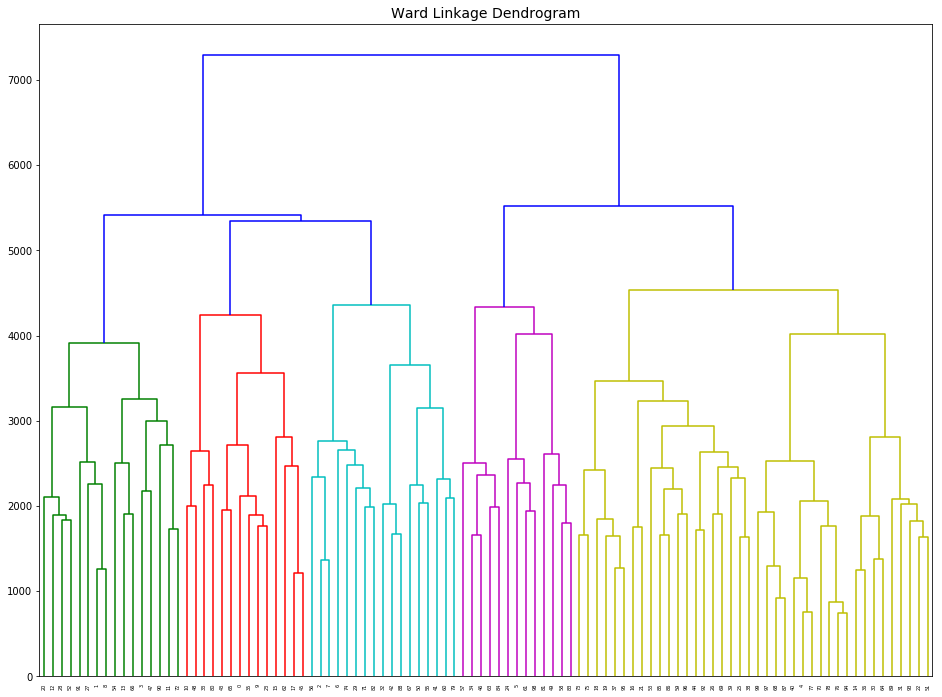

In [69]:
W = linkage(X[rows[:n_select_100],:], 'ward')
plt.figure(figsize=(16, 12))
dendro_ward = dendrogram(W)
plt.title("Ward Linkage Dendrogram", fontsize=14)

This cluster is more distinct than our first dendrogram that we made. However it seems like it has 5 different main groups, which is disappoing to us as we know there are 10 individual digits in our data set. Looking further down the line where each of those 5 split we can get around 9 distinct groups, which is much closer to our target. It would be very interesting to analyze these clusters and see what specific numbers it is having problems distinguishing. Simply by my intuition I would guess that "1" and "7" may be combined early into one cluster.

For the third method I will use the Single Linkage method in order to make the dendrogram. This uses the minimum distance between points in clusters. Lets see how this affects our dendrogram. |

Text(0.5, 1.0, 'Single Linkage Dendrogram')

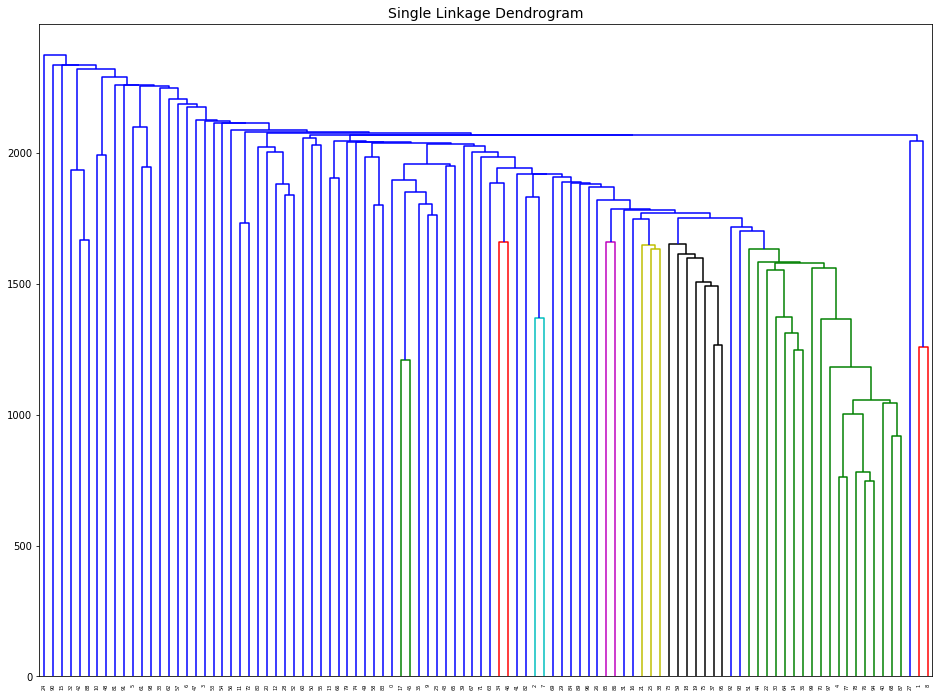

In [68]:
Y = linkage(X[rows[:n_select_100],:], 'single')
plt.figure(figsize=(16, 12))
dendro_single = dendrogram(Y)
plt.title("Single Linkage Dendrogram", fontsize=14)

This method seems to have the least amount of success of the 3 different methods. Clustering does not occur until much later in the process, and it is not clear how many different groups we should choose. There does not seem to be an overall trend like we would hope knowing that there are 10 different digits contained in our data set

### Grading

This homework is due **April 11th by 4:00 pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* PCA - 20%
* T-SNE - 20%
* K-means - 20%
* Hierarchical Clustering - 20%